<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Expresiones Regulares

Este *cuaderno* hace una breve introducción a Expresiones Regulares. El objetivo del *cuaderno* es que usted aprenda el funcionamiento  de las mismas para poder llevar a cabo procesamientos básicos del lenguaje natural que vamos a necesitar para sistemas de recomendación basados en contenido.


**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

Para motivar el estudio de expresiones regulares veamos la siguiente conversación realizada en 1966 por un chatbot llamado ELIZA y un ser humano:

*Usuario: Me siento triste.*

*ELIZA: ¿Cree que venir acá puede ayudarle a no sentirse triste?*

*Usuario: Necesito ayuda, de eso estoy seguro.*

*ELIZA: ¿Qué significa para usted obtener ayudar?*

*Usuario: A lo mejor podría aprender a llevárme mejor con mi madre.*

*ELIZA: Cuénteme más sobre su madre.*
 
*Usuario: Mi madre cuida de mí.*

*ELIZA: ¿Quién más en su familia cuida de usted?*

*Usuario: Mi padre.*

*ELIZA: ¿Su padre?*

*Usuario: De alguna manera usted se parece a mi padre.*


El fragmento anterio fue extraido de Weizenbaum (1966) y muestra como ELIZA, uno de los primeros sistemas de procesamiento del lenguaje natural, imita respuestas de un psicoterapeuta. Es más, este sistema fue programado para para imitar las respuestas de un [psicoterapeuta Rogersiano](https://es.wikipedia.org/wiki/Psicoterapia_centrada_en_el_cliente). 

Este programa ELIZA es muy simple y exitoso a la vez. Simple porque está entrenado para identificar frases del estilo *"Necesito X"* y responder frases del estilo *"¿Qué significa para usted obtener X?"*. El éxito, por otro lado, consiste en que este no tiene que tener conocimientos previos sobre el significado de las palabras. Este tipo de diálogos permiten que quien hace de terapeuta (ELIZA en este caso) no tenga que saber nada sobre el mundo. 

De hecho, Weizenbaum (1966) reporta que muchas de las personas que interactuaron con este bot creyeron que ELIZA en verdad los estaba entendiendo, inclusive, luego de que se les explicara a los participantes cómo funcionaba ELIZA, muchos seguían pensando que este robot era útil para ayudarlos a lidiar con sus problemas.

Hoy en día, los algoritmos de Procesamiento de Lenguaje Natural son mucho más complejos que ELIZA, sin embargo, la detección de patrones en el texto sigue siendo una base fundamental de este tipo de aplicaciones. En lo que resta del *cuaderno* exploraremos los conceptos básicos de cómo procesar lenguaje natural escrito, texto, para que sea interpretable por el computador, nos permita  extraer información relevante y hacer pre procesamiento necesario para que pueda ser el insumo de sistemas de recomendación.

## Normalización de texto

La primera etapa en el procesamiento de texto es estandarizarlo. Este proceso se conoce como *normalización*. En términos generales podemos clasificarlo en tres tipos de procesos de *normalización*:

   1. **Tokenización.** Este consiste en separar el texto en palabras o *tokens*. A priori este proceso parece intuitivamente sencillo, ya que habría que identificar los espacios en blanco y dividir los *tokens* a partir de los mismos. Sin embargo, ciertos conceptos están conformados por varias palabras. Por ejemplo, si tenemos un texto que tiene las palabras Nueva York y Economía Naranja, lo correcto sería tomar como un solo *token* "Nueva York" y "Economía Naranja", porque si se *tokenizan* usando los espacios se cambiaría el significado del texto. Adicionalmente, esta estrategia falla cuando quien escribe omite incluir espacios, algo frecuente en las redes sociales. El cerebro humano es capaz de distinguirlo, mientras que el computador no lo es. La correcta *tokenización* depende también del contexto y del idioma. Por ejemplo, en inglés, la palabra "I'm" se debe separar en "I" y "am" y en Japonés las palabras no se separan con espacio, es decir es importante tener en cuenta otras consideraciones al aplicar este procedimiento dependiendo del idioma en que fue escrito. Finalmente, los emojis o los hashtags transmiten información y hay que ser capaz de incorporarlo en el procesamiento.



2. **Lematización.** Para algunas aproximaciones, es importante tratar de unificar las palabras que se refieren al mismo concepto. Por ejemplo, si se quiere hacer un conteo simple para crear una nube de palabras de un documento; quisiéramos que corriendo, corrió, y correrá no se tratasen como palabras independientes. Lematización consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc.), hallar el [lema](https://es.wikipedia.org/wiki/Lema_(ling%C3%BC%C3%ADstica)) correspondiente. El [lema](https://es.wikipedia.org/wiki/Lema_(ling%C3%BC%C3%ADstica)) es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. En nuestro ejemplo: corriendo, corrió, y correrá se transformarían en el verbo en infinitivo *correr*. Una versión simplificada de la lematización es el **stemming** el cual consiste en encontrar la raíz de la palabra removiendo el sufijo o el final de las palabras. Por ejemplo, corrieron y correr se volverían *corr*. 



3. **Distancia entre palabras.** Este se utiliza para comparar palabras y conceptos. Al querer comparar entonces buscaremos tener una noción de qué tan diferentes son unas de otras. Una de las métricas más sencillas se llama *la distancia de edición* que consiste en contar el número de adiciones, eliminaciones y sustituciones que hay que hacerle a una palabra $i$ para que se convierta en la palabra $j$. Una aplicación de esto se encuentra en los algoritmos de corrección de ortografía y detección de discurso. Otras métricas más complejas serán estudiadas en *cuadernos* siguientes donde estudiaremos la distancia entre palabras en un espacio vectorial.

## Patrones básicos y Expresions Regulares

El punto de partida del manejo de texto es la detección de patrones en el mismo, esto se hace a través del uso de *expresiones regulares*. Estas que también son conocidas como *regex* o *regexp* son secuencias de caracteres que conforman patrones de búsqueda y tienen la ventaja de ser transversales a los distintos lenguajes de programación.

Para illustrar a qué nos referimos, comencemos con un ejemplo sencillo. El patrón más sencillo que se puede utilizar con expresiones regulares es utilizar secuencia de caracteres que uno quiere encontrar en el texto. Por ejemplo, si quisiéramos buscar la palabra *tienda* en un texto, simplemente podríamos usar como patrón `tienda`. Los patrones de búsqueda pueden estar conformados por un solo caracter como `!` para buscar signos de exclamación o también una secuencia de letras:

<div> <center> 

| **RE** |      **Ejemplo del patrón capturado**     |
|:------:|:-----------------------------------------:|
| tienda | El que tenga <u>tienda</u> que la atienda |
|    a   |    El que m<u>a</u>druga Dios le ayuda    |
|    !   |            !Ojo con eso<u>!</u>           |

</center> </div>   

Este tipo de búsquedas es sensible al uso de mayúsculas, por ejemplo, buscar la palabra `tienda` arroja un resultado diferente al de buscar `Tienda`. Del mismo modo, también es sensible al uso de caracteres especiales como tildes, apostrofes, etc. En la práctica se suelen eliminar estos caracteres especiales para simplificar el texto analizado. Por ejemplo, transformar un texto como:

**<center> A palabras necias oídos sordos </center>**

por 

**<center> a palabras necias oidos sordos </center>** 

hará más sencillo su tratamiento. No obstante, las expresiones regulares son una herramienta superpoderosa y nos permiten usar funciones que simplifican la tarea. Por ejemplo, podemos usar los corchetes (`[]`) para expresar disyunción lógica (`o`). Por ejemplo, la búsqueda `[Tt]ienda` sirve para encontrar la palabra `tienda` **o** la palabra `Tienda`. Los corchetes indican que se busca una palabra que contenga la cadena `ienda` precedida por una letra `t` en minúscula **o** mayúscula. Por ejemplo:

<div> <center> 

|    **RE**    |**Patrón capturado**|          **Ejemplo del patrón capturado**            |
|:------------:|:----------------:|:------------------------------------------------------:|
|   [Tt]ienda  |  Tienda o tienda |        El que tiene <u>tienda</u> que la atienda       |
|     [abc]    |   a, b **o** c   | No me <u>a</u>bra los ojos que no le voy a echar gotas |
| [1234567890] | Cualquier dígito |           Eramos al rededor de <u>5</u> a 8 personas   |

</div> </center> 

Notemos en la última linea que la expresión regular `[1234567890]` nos permite capturar cualquier dígito, no obstante, escribir bloques de dígitos o letras puede ser inconveniente. Es decir, para capturar cualquier letra no es práctico escribir todo el abecedario: `[abcdefghijklmnopqrstuvwxyz]`. En estos casos uno puede completar la búsqueda dentro de corchetes con un guión (`-`) que especifica rangos. Por ejemplo `[0-9]` nos permite capturar cualquier número entre 0 y 9, `[b-g]` nos permite capturar cualquier letra de la `b` a la `g` o sea *b, c, d, e, f **o** g*.

<div> <center>

| **RE** |     **Patrón capturado**     |            **Ejemplo del patrón capturado**            |
|:------:|:----------------------------:|:------------------------------------------------------:|
|  [A-Z] | Cualquier letra en mayúscula |        <u>E</u>l que tiene tienda que la atienda       |
|  [a-z] | Cualquier letra en minúscula | N<u>o</u> me abra los ojos que no le voy a echar gotas |
|  [0-9] |       Cualquier dígito       |       Eramos al rededor de <u>5</u> a 8 personas       |

</div> </center>

Podemos también indicar que caracteres no deben ser capturados, para ello utilizamos un caret (`^`) al inicio del corchete `[^]`. Sólo si el caret (`^`) es el primer símbolo dentro del corchete, el patrón subsiguiente es negado. Por ejemplo, `[^a]` significa que se va a capturar cualquier caracter, incluyendo los especiales, excepto la letra *a*. 

<div> <center>

| **RE** |               **Patrón capturado**              |            **Ejemplo del patrón capturado**            |
|:------:|:-----------------------------------------------:|:------------------------------------------------------:|
| [^A-Z] | Cualquier caracter menos una letra en mayúscula |       E<u>l</u> que tiene tienda que la atienda       |
|  [^Ss] |     Cualquier caracter excepto una "s" o "S"    | <u>N</u>o me abra los ojos que no le voy a echar gotas |
|  [^.]  |        Cualquier caracter menos un punto        |       <u>E</u>ramos al rededor de 5 a 8 personas       |
|  [e^]  |             Captura una "e" o un "^"            |                       <u>e</u>^x                       |
|  [a^b] |                   Captura a^b                   |                 La expresión <u>a^b</u>                |

</div> </center>

Note sin embargo, que si se usa el caret (`^`) en cualquier otro lugar de la expresión regular, este no va a significar una negación, sino un caret.

Del mismo modo, a menudo buscamos capturar patrones opcionales. Por ejemplo, para capturar una palabra en plural o en singular en donde el último caracter es una *s*. Para esto utilizamos el símbolo de pregunta (`?`) después del caracter opcional. El signo de pregunta (`?`) en el contexto de expresiones regulares significa el caracter anterior o ninguno.


<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
| tiendas? | "tienda" o "tiendas" |       El que tenga <u>tienda</u> que la atienda       |
|  colou?r |  "color" o "colour"  | Discover the newest hand-picked <u>color</u> palettes |

</div> </center>

Pero también existen casos donde un caracter se puede repetir más de una vez. Por ejemplo, en un libro se podría encontrar la onomatopeya del mujido de una vaca de diversas formas:

**<center> Muu! </center>**

**<center> Muuu! </center>** 

**<center> Muuuu! </center>** 

**<center> Muuuuu! </center>** 

A grandes rasgos, podemos describir esta onomatopeya como una palabra que comienza con una *M* seguida con por lo menos dos *u* y finaliza con el signo de exclamación *!*. La expresión regular que nos permite capturar cero o más ocurrencias de un caracter es el asterisco (`*`) también conocido como *cleany star* o *Kleene* . Por ende, la expresión regular `u*` va a capturar tanto `u` como `uuuuuu`, pero a su vez también podría capturar `vaca` pues esta palabra tiene cero letras u. 

Para corregir esto, podríamos usar la expresión regular `uu*` la cual significa una o más letras u. Algunos patrones más complejos también se pueden utilizar haciendo uso de los corchetes; por ejemplo `[ab]\*` sirve para capturar cero o más *a*s o *b*s. Por ende, se capturarían textos como *aaaaa*, *bbb* o *ababababab*.

Asimismo, para especificar múltiples dígitos podemos usar `[0-9][0-9]*` para capturar cualquier entero. 

Sin embargo, aún podemos utilizar el signo de suma (`+`), también llamado *Kleene +*, para simplificar las expresiones regulares. El *Kleene +*, nos permite denotar que el caracter a capturar se repite una o más veces. Por ende, la expresión `[0-9]+` es la forma más común de expresar una secuencia de dígitos. Por ejemplo:

<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
   |
|   baa*   |  ba con una o más as |               La cabra hace <u>baaa</u>!              |
    |   mu+!   | mu! con una o más us |              La vaca hizo <u>muuuuu!</u>           
|  [0-9]+  |   Cualquier entero   |              Ese camisa cuesta $<u>25</u>             |

</div> </center>

Otra función importante esta dada por el punto (`.`). Este funciona como comodín o *wildcard*. Esta expresión regular sirve para capturar cualquier caracter excepto los saltos de línea. 

<div> <center>

|  **RE**  | **Patrón capturado** |            **Ejemplo del patrón capturado**           |
|:--------:|:--------------------:|:-----------------------------------------------------:|
   |
|   1. | 10 y 1A             | Ganaron el partido <u>18</u> a 2             |
|  1.4 | 114 y 1B4            | Vive en el apartamento <u>1B4<u> |

</div> </center>

También existen los denominado anclas o *anchors* que sirven para capturar elementos en posiciones particulares del texto. Los más comunes son el caret (`^`) y el símbolo de dolar (`$`) los cuales hacen alusión al inicio y final de un texto respectivamente. Por ejemplo, la expresión `^El` solo captura la palabra *El* sólo si está al inicio del corpus de texto. Otras anclas comunes son (`\b`) y (`\B`) que denotan los *boundaries* o límites de una palabra o dentro de una palabra respectivamente. Por ejemplo, `\bel\b` va a capturar la palabra *el* pero no *elefante*.

### Disyunción, agrupación y precedencia


A menudo estaremos interesados en buscar más de una palabra a la vez. Por ejemplo, si en nuestro texto quisiéramos buscar países de Latinoamérica,  escribir `[ColombiaPerúChileMéxico...]` sólo nos devolvería alguna de las letras presentes en los corchetes. El operador de disyunción (`|`) sirve para este tipo de casos donde estamos interesados en una u otra palabra, por eso, el patrón `Colombia|Perú|Chile` devuelve Colombia, Perú o Chile. 

A su vez, puede que nos interesemos no sólo en los países como tal, sino también los gentilicios. Por ejemplo, si queremos extraer Chile o Chilenos necesitamos sofisticar nuestro operador de disyunción para evitar escribir la expresión `Chile|Chilenos`. En este caso podemos utilizar  paréntesis para inidcar que la disyunción sólo aplica para una parte del texto: `Chil(e|enos)`. Note que si omitiéramos los paréntesis `Chile|enos` solo se capturaría *Chile* o *enos* y dado que *Chile* tiene precedencia sobre *enos* en caso de encontrar la palabra *Chilenos* sólo se extraería la primer parte: *Chile* sin el *nos*.

Los paréntesis también son un gran complemento para los asteriscos (`*`). Supongamos poseemos el índice de un libro que tiene el siguiente texto: Capítulo 1, Capítulo 2, Capítulo 3, etc. Para capturar todos los capítulos necesitamos crear un patrón que capture repetidamente la palabra *Capítulo* seguida de algún entero. La expresión regular `Capítulo [0-9]+ *` sólo captura *Capítulo* seguida de un entero y 0 más espacios, en este caso necesitamos utilizar los paréntesis: `(Capítulo [0-9]+ *)*`.

### Algunos operadores adicionales

<div> <center>

| **RE** | **Expansión** |                          **Patrón capturado**                         |
|:------:|:-------------:|:---------------------------------------------------------------------:|
|   \d   |     [0-9]     |                            Cualquier dígito                           |
|   \D   |     [^0-9]    |                          Cualquier no dígito                          |
|   \w   |  [a-zA-Z0-9_] |                  Cualquier alfanumérico o guion bajo                  |
|   \W   |     [ˆ\w]     |                 Cualquier no alfanumérico o guion bajo                |
|   \s   |  [ \r\t\n\f]  |                           Espacio en blanco                           |
|   \S   |     [ˆ\s]     |                        No un espacio en blanco                        |
|    *   |               |         Cero o más ocurrencias del caracter o expresión pasada        |
|    +   |               |         Una o más ocurrencias del caracter o expresión pasada         |
|    ?   |               | Exactamente cero o una ocurrencia del del caracter o expresión pasada |
|   {n}  |               |            *n* ocurrencias del caracter o expresión pasada            |
|  {n,m} |               |        De *n* a *m* ocurrencias del caracter o expresión pasada       |
|  {n,}  |               |      Por lo menos *n* ocurrencias del caracter o expresión pasada     |
|  {,m}  |               |         Hasta *m* ocurrencias del caracter o expresión pasada         |

</div> </center>

Estos son algunos de los patrones y operadores básicos que vamos a necesitar y utilizar en este curso; sin embargo hay mucho más y los invito a explorarlos por su cuenta. Antes de ilustrar el uso en `Python` es importante recomendar la página https://regexr.com  que permite probar el correcto funcionamiento de las expresiones regulares creadas antes de utilizarlas en el código.

## Ejemplo en `Python`

Para ilustrar cómo podemos utilizar expresiones regulares en `Python` vamos a hacer un análisis de texto sencillo sobre el Acuerdo de Paz que firmó el Gobierno de Colombia con el grupo guerrillero FARC-EP en el año 2016. 

El análisis sencillo que buscamos hacer es armar una nube de palabras para ver cuáles son los términos más frecuentes en el documento.

Para ello, incluimos el acuerdo en formato `pdf` en la carpeta `data`. Para cargar archivos `pdf` utilizamos la librería `pdfplumber` y con la función `open` vamos a extraer las páginas del acuerdo.

In [1]:
# Cargamos pdfplumber
import pdfplumber

# Procedemos a extraer todo el texto del documento
with pdfplumber.open('data/acuerdo_final.pdf') as pdf:
    paginas = pdf.pages
    documento = ""
    for pag in paginas:
        text = pag.extract_text()
        documento = documento + " " + text
        
# Visualizamos 500 caracteres del texto
print(documento[0:500])        

 Acuerdo	Final	
12.11.2016	
ACUERDO	FINAL	PARA	LA	TERMINACIÓN	DEL	CONFLICTO	Y	LA	CONSTRUCCIÓN	DE	UNA	PAZ	
ESTABLE	Y	DURADERA	
	
PREÁMBULO	
Recordando	que	los	diálogos	de	La	Habana	entre	delegados	y	delegadas	del	Gobierno	Nacional,	
presidido	por	el	Presidente	Juan	Manuel	Santos	y	delegados	y	delegadas	de	las	Fuerzas	Armadas	
Revolucionarias	de	Colombia-Ejército	del	Pueblo,	con	la	decisión	mutua	de	poner	fin	al	conflicto	
armado	nacional,	tuvieron	origen	como	resultado	del	Encuentro	Exploratorio	


### Limpieza de texto usando expresiones regulares

Para trabajar con expresiones regulares vamos a utilizar la librería  `re` que cuenta entre sus principales funciones a:

* findall: retorna una lista con todos los matchs dentro del texto.
* search: retorna un objeto de tipo *match* si existe algún match en el texto.
* split: devuelve una lista donde la cadena se ha dividido en cada match.
* sub: reemplaza una o más coincidencias con el texto deseado.

A su vez, otros paquetes como `Pandas` tienen métodos que permiten hacer uso de expresiones regulares para modificar el objeto. 

Dado que tenemos el texto en español y nuestro idioma utiliza tildes, esto genera a veces inconvenientes. La librería `unidecode` nos ayuda a solucionar este problema.

In [2]:
# Cargamos las librerías a utilizar
import re
import unidecode

# Quitamos tildes
documento = unidecode.unidecode(documento)
print(documento[0:500]) 

 Acuerdo	Final	
12.11.2016	
ACUERDO	FINAL	PARA	LA	TERMINACION	DEL	CONFLICTO	Y	LA	CONSTRUCCION	DE	UNA	PAZ	
ESTABLE	Y	DURADERA	
	
PREAMBULO	
Recordando	que	los	dialogos	de	La	Habana	entre	delegados	y	delegadas	del	Gobierno	Nacional,	
presidido	por	el	Presidente	Juan	Manuel	Santos	y	delegados	y	delegadas	de	las	Fuerzas	Armadas	
Revolucionarias	de	Colombia-Ejercito	del	Pueblo,	con	la	decision	mutua	de	poner	fin	al	conflicto	
armado	nacional,	tuvieron	origen	como	resultado	del	Encuentro	Exploratorio	


Podemos ver que *Ejército* aparecía con tilde ya no la tiene. 

A continuación usaremos la expresión regular `[^A-Za-z0-9 ]+` para matchear todo lo que no sea un caracter alfanumérico o un espacio y lo reemplazamos con un espacio. Esto quitará comas, guiones y otros caracteres especiales o signos de puntuación. Note la presencia del caret `^` al inicio de los corchetes cuadrados.

In [3]:
# documento = re.sub('[^A-Za-z0-9 ]+', ' ', documento)
print(documento[0:500])

 Acuerdo	Final	
12.11.2016	
ACUERDO	FINAL	PARA	LA	TERMINACION	DEL	CONFLICTO	Y	LA	CONSTRUCCION	DE	UNA	PAZ	
ESTABLE	Y	DURADERA	
	
PREAMBULO	
Recordando	que	los	dialogos	de	La	Habana	entre	delegados	y	delegadas	del	Gobierno	Nacional,	
presidido	por	el	Presidente	Juan	Manuel	Santos	y	delegados	y	delegadas	de	las	Fuerzas	Armadas	
Revolucionarias	de	Colombia-Ejercito	del	Pueblo,	con	la	decision	mutua	de	poner	fin	al	conflicto	
armado	nacional,	tuvieron	origen	como	resultado	del	Encuentro	Exploratorio	


A continuación ponemos todo en minúscula y con un sólo espacio

In [4]:
# Minúsculas
documento = documento.lower()
# Espacios
documento = re.sub('\s+', ' ', documento)
print(documento[0:500])

 acuerdo final 12.11.2016 acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional, presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia-ejercito del pueblo, con la decision mutua de poner fin al conflicto armado nacional, tuvieron origen como resultado del encuentro exploratorio sucedido e


Puesto que nos interesa ver la frecuencia de palabras, eliminaremos todos los números y espacios no simples que se hayan generado.

In [5]:
documento = re.sub("\d+", "", documento)
documento = re.sub('\s+', ' ', documento)
documento = documento.strip()
print(documento[0:500])

acuerdo final .. acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional, presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia-ejercito del pueblo, con la decision mutua de poner fin al conflicto armado nacional, tuvieron origen como resultado del encuentro exploratorio sucedido en la capi


Note que la expresión regular `'\s+'` hace alusión a que se matcheen todo tipo de espacios en blanco 1 o más veces. Estos incluyen tabs, saltos a nuevas líneas, entre otros. Esta expresión regular es mucho más completa que `' +'`, que sólo identifica los espacios en blanco que separan palabras dentro de una misma línea.

### Tokenización

El texto ahora está lo suficientemente limpio, pero para determinar la frecuencia de palabras debemos
separar los términos. Para ello vamos a tokenizarlo, es decir a partirlo en palabra por palabra; luego vamos a eliminar palabras redundantes o stopwords, y finalmente vamos lemmatizar el texto.

La librería `nltk` suele ser la librería más utilizada para realizar procesamiento del lenguaje natural en `Python`, sin embargo este aún no cuenta con un módulo para hacer lemmatización en Español. Por eso usaremos la librería  [spacy](https://spacy.io/models/es) como complemento. Para ello tenemos que bajar el módulo de scpacy para español (esto es necesario sólo hacerlo una vez, y por lo tanto queda comentada la linea a cotinuación):

In [6]:
#!python -m spacy download es_core_news_sm

In [7]:
# Cargamos spacy
import spacy

# Utilizamos spacy para tokenizar el documento
nlp = spacy.load("es_core_news_sm")

doc = nlp(documento)

print(doc[0:500])

acuerdo final .. acuerdo final para la terminacion del conflicto y la construccion de una paz estable y duradera preambulo recordando que los dialogos de la habana entre delegados y delegadas del gobierno nacional, presidido por el presidente juan manuel santos y delegados y delegadas de las fuerzas armadas revolucionarias de colombia-ejercito del pueblo, con la decision mutua de poner fin al conflicto armado nacional, tuvieron origen como resultado del encuentro exploratorio sucedido en la capital de la republica de cuba entre el dia de febrero y el dia de agosto de ; estimando que como resultado de los dialogos exploratorios referidos se produjo un acuerdo general para la terminacion del conflicto y la construccion de una paz estable y duradera, firmado en la fecha ultima citada ante testigos nacionales y ante delegados de la republica de cuba y del reino de noruega que sirvieron igualmente como testigos, y que, desde entonces, asienten el proceso como paises garantes; destacando que

El próximo paso es eliminar lo que se conoce como las *stopwords*, que son aquellas palabras que no le añaden ningún significado al texto, por ejemplo: el, la, y, o, del, con, a, etc. Para ello, ahora sí, utilizamemos `nltk` que posee una lista de los stopwords por idioma. 

Vamos a descargar las del idioma español y a ponerlas en el formato acorde a nuestro documento. (Si este camino arroja error, podés importar *nltk* (`import nltk`) y ejecutar (`nltk.download()`) se abrirá un menú donde podés instalar el corpus de *stopwords*)

In [8]:
# Eliminamos stopwords
from nltk.corpus import stopwords

stopwords = set(stopwords.words("spanish"))

# Creamos un diccionario de stopwords en español
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)

doc2 = [tok for tok in doc if str(tok) not in stopwords]

Con el documento tokenizado y eliminadas las *stopwords*, el siguiente paso es lematizarlo para unificar las palabras que se refieren al mismo concepto.

In [9]:
lemmas = [unidecode.unidecode(tok.lemma_) for tok in doc2]

" ".join(lemmas[0:200])

'acuerdo final .. acuerdo final terminacion conflicto construccion paz estable duradera preambulo recordar dialogo habana delegado delegada gobierno nacional , presidido presidente juan manuel santos delegado delegada fuerza armado revolucionario colombia-ejercito pueblo , decision mutuo poner fin conflicto armado nacional , origen resultado encuentro exploratorio sucedido capital republica cuba dia febrero dia agosto ; estimar resultado dialogo exploratorio referido producir acuerdo general terminacion conflicto construccion paz estable duradero , firmado fecha ultimo citado testigo nacional delegado republica cuba reino noruega servir igualmente testigo , , entonces , asientir proceso pais garant ; destacar republica bolivarian venezuela republica chile aprestar momento brindar buen oficio pais acompanant ; rememorar desarrollo agenda aprobado acuerdo mencion instalo mesa conversacion dia octubre ciudad oslo , capital reino noruega , luego continuar actividad capital cubano solucion 

Luego, encontraremos las raíces de las palabras (*stemming*).

In [10]:

import nltk
from nltk import SnowballStemmer
spanishstemmer = SnowballStemmer("spanish")

stems = [spanishstemmer.stem(token) for token in lemmas]

" ".join(stems[0:200])

'acuerd final .. acuerd final terminacion conflict construccion paz establ durader preambul record dialog haban deleg deleg gobiern nacional , presid president juan manuel sant deleg deleg fuerz armad revolucionari colombia-ejercit puebl , decision mutu pon fin conflict armad nacional , orig result encuentr exploratori suced capital republ cub dia febrer dia agost ; estim result dialog exploratori refer produc acuerd general terminacion conflict construccion paz establ durader , firm fech ultim cit testig nacional deleg republ cub rein norueg serv igual testig , , entonc , asient proces pais garant ; destac republ bolivari venezuel republ chil aprest moment brind buen ofici pais acompanant ; rememor desarroll agend aprob acuerd mencion instal mes conversacion dia octubr ciud oslo , capital rein norueg , lueg continu activ capital cuban solucion continu celebracion acto suscripcion nuev acuerd final ; consider consecuent atra enunci agost ano curs part suscrib acuerd final terminacion c

Una desventaja del stemming es que sus algoritmos son más simples que los de lematización. Pueden recortar demasiado la raíz y encontrar relaciones entre palabras que realmente no existen (*overstemming*). También puede suceder que deje raíces demasiado extensas o específicas, y que tengamos más bien un déficit de raíces (*understemming*); en cuyo caso, las palabras que deberían convertirse en una misma raíz no lo hacen.

Con nuestro texto "limpio", podemos ver la frecuencia de palabras y así visualizar  los conceptos más importantes del acuerdo.

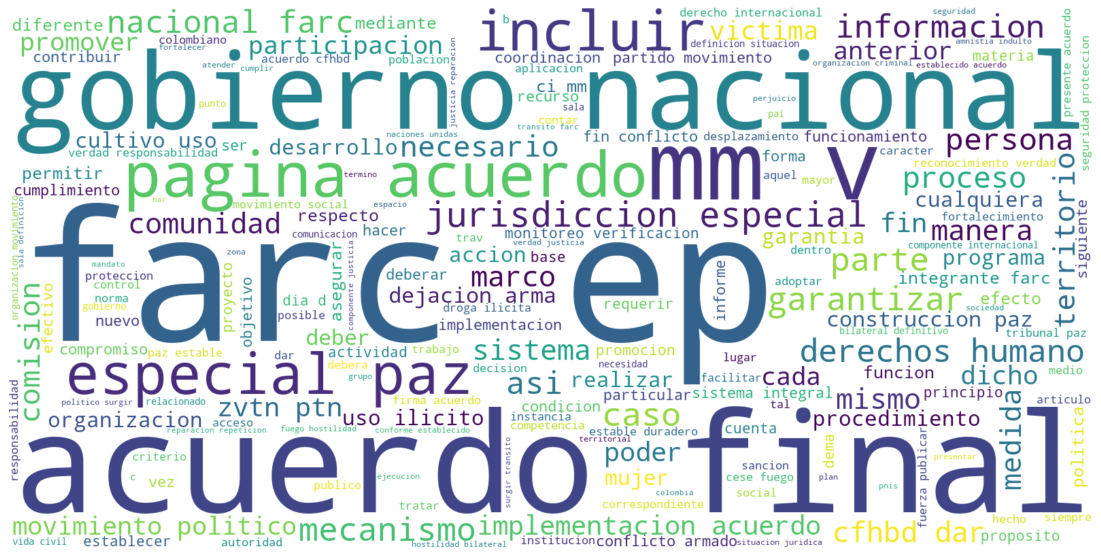

In [11]:
# Cargamos las librerías a utilizar
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Armamos la nube de palabras
text = " ".join(lemmas)
wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Referencias

- Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.".

- Jurafsky, D., &; Martin, J. H. (2020). Speech and language processing: An introduction to natural language processing, computational linguistics, and speech recognition. Pearson.

- Weizenbaum, J. 1966. ELIZA – A computer program for the study of natural language communication between man and machine. CACM, 9(1):36–45.
 
